<B>Color Selection Code</B>

In [1]:
# Do all the necessary imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
# Read in the image and print out the stats
image = mpimg.imread('image.jpg')
print('This image is ', type(image), ' with dimensions ', image.shape)

This image is  <class 'numpy.ndarray'>  with dimensions  (381, 685, 3)


In [3]:
# Define our color selection criteria

red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]


In [4]:
# copy original image
color_select = np.copy(image)

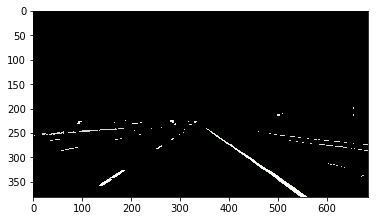

In [5]:
# Identify pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) \
            |(image[:,:,1] < rgb_threshold[1]) \
            |(image[:,:,2] < rgb_threshold[2])
        
color_select[color_thresholds] = [0,0,0]

# Display the image
plt.imshow(color_select)
plt.show()

<B>Region Masking Code</B>

In [6]:
# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

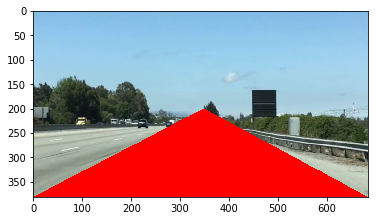

In [14]:
# Define a triangle region of interest
# keep in mind the origin (x=0,y=0) is in the upper left in image processing

left_bottom = [0, 380]
right_bottom = [684, 380]
apex = [349, 220]

# fit lines (y=Ax+B) to identify the 3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Find region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

# Display the image
plt.imshow(region_select)
plt.show()

<B> Color and Region Combined </B>

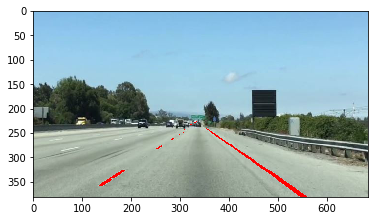

In [16]:
# Make a copy
color_region = np.copy(image)
line_image = np.copy(image)

# Mask color and region together
color_region[color_thresholds | ~region_thresholds] = [0,0,0]

# Color pixels red where both color and region selections meet
line_image[~color_thresholds & region_thresholds] = [255,0,0]

#plt.imshow(color_region)
plt.imshow(line_image)
plt.show()

